In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("talking_data.csv")
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [3]:
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [4]:
print("Uniques in app column", data.app.nunique())
print("Uniques in device column", data.device.nunique())
print("Uniques in os column", data.os.nunique())
print("Uniques in channel column", data.channel.nunique())
print("Uniques in click_time column", data.click_time.nunique())
print("Uniques in attributed time column", data.attributed_time.nunique())
print("Uniques in is_attributed column", data.is_attributed.nunique())

Uniques in app column 161
Uniques in device column 100
Uniques in os column 130
Uniques in channel column 161
Uniques in click_time column 80350
Uniques in attributed time column 227
Uniques in is_attributed column 2


Click time has a majority of unique values 

In [5]:
data["app"].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64

In [6]:
data.groupby("app").size()

app
1       3135
2      11737
3      18279
4         58
5        188
       ...  
486        1
536        1
538        1
548        1
551        1
Length: 161, dtype: int64

In [7]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [8]:
apps = data.groupby("app").size().reset_index(name="count")
apps = apps[apps['count']>apps['count'].quantile(0.8)]
apps = apps.merge(data, on="app", how="inner")
apps

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,NaN,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,NaN,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,NaN,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,NaN,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,NaN,0
...,...,...,...,...,...,...,...,...,...
98972,151,109,26762,0,0,347,2017-11-07 11:03:36,NaN,0
98973,151,109,86767,0,24,347,2017-11-08 05:19:23,NaN,0
98974,151,109,81674,0,0,347,2017-11-08 04:31:22,NaN,0
98975,151,109,147113,0,38,347,2017-11-08 11:05:23,NaN,0


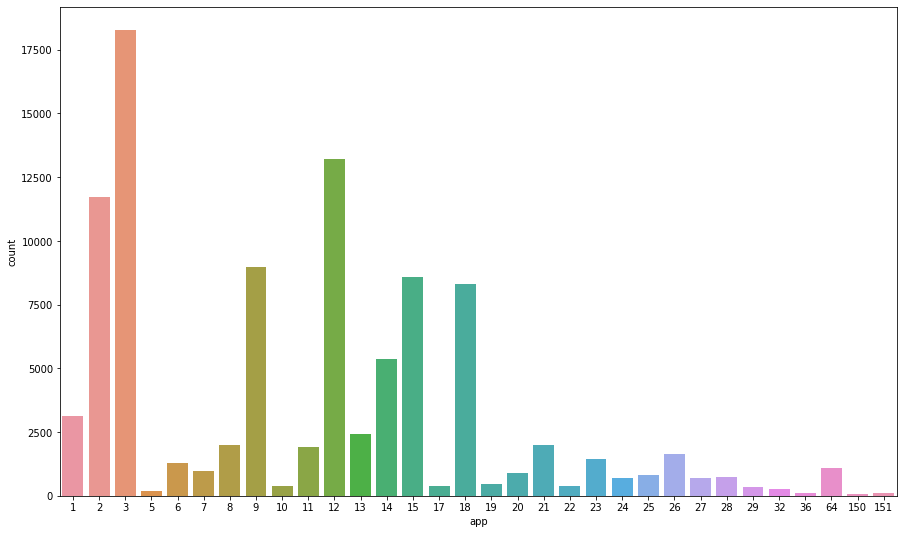

In [9]:
plt.figure(figsize=(15, 9))
sns.countplot(x="app", data=apps)
plt.show()

In [10]:
apps["app"].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
18      8315
14      5359
1       3135
13      2422
8       2004
21      1979
11      1927
26      1633
23      1454
6       1303
64      1079
7        981
20       911
25       804
28       720
24       704
27       696
19       478
10       388
22       386
17       380
29       360
32       286
5        188
151      109
36       102
150       73
Name: app, dtype: int64

In [11]:
import datetime as dt

In [12]:
apps["click_time"] = pd.to_datetime(apps["click_time"])

In [13]:
apps["click_time"]

0       2017-11-09 01:17:58
1       2017-11-07 17:22:52
2       2017-11-07 09:37:21
3       2017-11-09 14:27:57
4       2017-11-07 15:06:06
                ...        
98972   2017-11-07 11:03:36
98973   2017-11-08 05:19:23
98974   2017-11-08 04:31:22
98975   2017-11-08 11:05:23
98976   2017-11-07 04:42:09
Name: click_time, Length: 98977, dtype: datetime64[ns]

In [14]:
apps["hours"] = apps["click_time"].dt.hour
apps["minutes"] = apps["click_time"].dt.minute
apps["sec"] = apps["click_time"].dt.second


In [15]:
apps.head()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed,hours,minutes,sec
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,NaN,0,1,17,58
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,NaN,0,17,22,52
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,NaN,0,9,37,21
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,NaN,0,14,27,57
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,NaN,0,15,6,6


In [16]:
apps.drop(columns=["click_time"], inplace=True)


In [17]:
apps.drop(columns=["attributed_time"], inplace=True)

In [18]:
apps.head()

,app,count,ip,device,os,channel,is_attributed,hours,minutes,sec
0,1,3135,17059,1,17,135,0,1,17,58
1,1,3135,52432,1,13,115,0,17,22,52
2,1,3135,89242,1,27,124,0,9,37,21
3,1,3135,123994,1,19,101,0,14,27,57
4,1,3135,34067,1,15,134,0,15,6,6


In [19]:
X = apps.drop(columns=["is_attributed"])
y = apps["is_attributed"]

 Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
     check the average download rates('is_attributed') for train and test data, scores should be comparable.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train.shape

(79181, 9)

In [22]:
X_test.shape

(19796, 9)

In [23]:
y_train.shape

(79181,)

In [24]:
y_test.shape

(19796,)

In [25]:
y_train.value_counts()

0    79059
1      122
Name: is_attributed, dtype: int64

In training data there are 124 records which indicates that the app was downloaded

In [26]:
y_test.value_counts()

0    19766
1       30
Name: is_attributed, dtype: int64

In testing data there are 28 records which indicates that the app was downloaded

In [27]:
from xgboost import XGBClassifier

In [28]:
classifier = XGBClassifier()

In [29]:
classifier.fit(X_train, y_train)

XGBClassifier()

In [30]:
pred_y = classifier.predict(X_test)

In [31]:
pred_y

array([0, 0, 0, ..., 0, 0, 0])

Training Accuracy

In [32]:
pred_y_train = classifier.predict(X_train)

In [33]:
accuracy_score(y_train, pred_y_train)

0.9987370707619252

In [34]:
accuracy_score(y_test, pred_y)

0.9985350575873914

In [35]:
classifier.score(X_test, y_test)

0.9985350575873914

In [36]:
from sklearn.metrics import roc_curve

In [37]:
pred_proba_XG = classifier.predict_proba(X_test)
fpr1, tpr1, thres1 = roc_curve(y_test, pred_proba_XG[:,1])

In [38]:
from sklearn.metrics import roc_auc_score
auc_score_XG = roc_auc_score(y_test, pred_proba_XG[:,1])
print(auc_score_XG)

0.8719315997166852


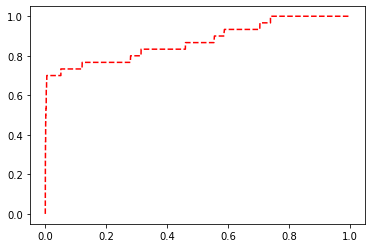

In [39]:
plt.plot(fpr1, tpr1, linestyle="--", color="red", label="XG Boost Classifier")

## SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [41]:
X_smote, y_smote = smote.fit_resample(X, y)

In [42]:
X_smote.shape

(197650, 9)

In [43]:
y_smote.shape

(197650,)

In [44]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.2)


In [45]:
X_train_sm.shape

(158120, 9)

In [46]:
y_train_sm.shape

(158120,)

In [47]:
X_test_sm.shape

(39530, 9)

In [48]:
y_test_sm.shape

(39530,)

## XGBOOST CLASSIFIER USING SMOTE

In [49]:
from xgboost import XGBClassifier
XGB_sm = XGBClassifier()

XGB_sm.fit(X_train_sm, y_train_sm)


XGBClassifier()

In [50]:
y_test_sm.value_counts()

1    19955
0    19575
Name: is_attributed, dtype: int64

In [51]:
y_train_sm.value_counts()

0    79250
1    78870
Name: is_attributed, dtype: int64

In [52]:
pred_y_train_sm = XGB_sm.predict(X_train_sm)

Training Accuracy

In [53]:
accuracy_score(y_train_sm, pred_y_train_sm)

0.9685555274475082

In [54]:
pred_y_sm = XGB_sm.predict(X_test_sm)
pred_y_sm

array([1, 0, 0, ..., 1, 1, 0])

In [55]:
XGB_sm.score(X_test_sm, y_test_sm)

0.9672400708322793

In [56]:
print(confusion_matrix(y_test_sm, pred_y_sm))

[[19220   355]
 [  940 19015]]


In [57]:
print(classification_report(y_test_sm, pred_y_sm))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     19575
           1       0.98      0.95      0.97     19955

    accuracy                           0.97     39530
   macro avg       0.97      0.97      0.97     39530
weighted avg       0.97      0.97      0.97     39530



In [58]:
pred_proba_XG_sm = XGB_sm.predict_proba(X_test_sm)
fprsm_xg, tprsm_xg, thresm_xg = roc_curve(y_test_sm, pred_proba_XG_sm[:,1])

In [59]:
auc_roc_sm_XG = roc_auc_score(y_test_sm, pred_proba_XG_sm[:,1])
print(auc_roc_sm_XG)

0.995850463030964


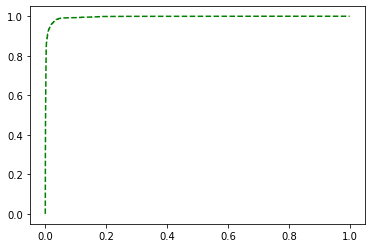

In [60]:
plt.plot(fprsm_xg, tprsm_xg, linestyle="--", color="green", label="XG Boost Classifier using SMOTE")

Hyperparameter Tuning

In [61]:
parameters = {"max_depth": range(0,10), 'min_samples_leaf': range(10,200,20),  'min_samples_split':range(10, 200, 20), 'criterion': ["gini","entropy"]}

In [62]:
n_folds = 5

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [64]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [65]:
tree = GridSearchCV(decision_tree, parameters, cv=n_folds, scoring="accuracy", return_train_score= True)

In [66]:
tree.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greate

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(10, 200, 20),
                         'min_samples_split': range(10, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [67]:
scores = tree.cv_results_

In [72]:
scores

{'mean_fit_time': array([0.07033591, 0.0467412 , 0.04522486, ..., 0.56614194, 0.5604147 ,
        0.55409727]),
 'mean_score_time': array([0.        , 0.        , 0.        , ..., 0.00827365, 0.00838995,
        0.00817552]),
 'mean_test_score': array([       nan,        nan,        nan, ..., 0.95724134, 0.95724134,
        0.95724134]),
 'mean_train_score': array([       nan,        nan,        nan, ..., 0.95772831, 0.95772831,
        0.95772831]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[0, 0, 0, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 10, 10, ..., 190, 190, 190],
              mask=[False, False, False, 

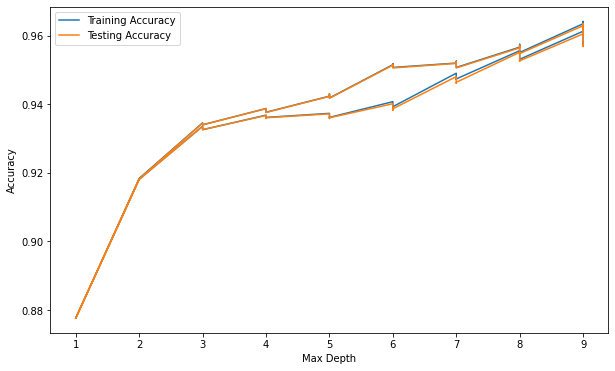

In [69]:
plt.figure(figsize=(10,6))
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="Training Accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

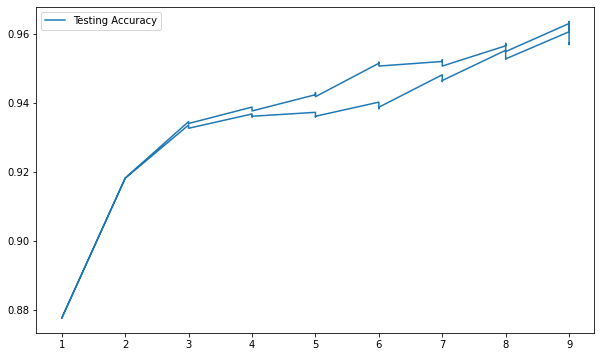

In [70]:
plt.figure(figsize=(10,6))
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="Testing Accuracy")
plt.legend()
plt.show()

In [71]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 70,
 'min_samples_split': 10}